Need to upload a dataset in a (.zip) file in google collab workspace.

In [1]:
try:
    import patoolib
except ImportError:
  %pip install patool
  import patoolib

In [2]:
patoolib.extract_archive('PyTorch_Proj_Chess_dataset.zip')

INFO patool: Extracting PyTorch_Proj_Chess_dataset.zip ...
INFO patool: ... PyTorch_Proj_Chess_dataset.zip extracted to `PyTorch_Proj_Chess_dataset4' (local file exists).


'PyTorch_Proj_Chess_dataset4'

Note: Make sure, (.zip) file is unzipped.

Refresh the Files in the File Section.

Converting Image Dataset in format to be used for creating model.

Refered https://medium.com/@joshuale/building-custom-datasets-for-pytorch-deep-learning-image-classification-29989971652d for custom dataset.

In [3]:
dataset_path = "./Chessman-image-dataset/Chess/"

In [4]:
import os
import csv
try:
    import pandas as pd
except ImportError:
    %pip install pandas
    import pandas as pd

In [5]:
directory = dataset_path
def build_csv(directory_string, output_csv_name):
    """Builds a csv file for pytorch training from a directory of folders of images.
    Install csv module if not already installed.
    Args:
    directory_string: string of directory path, e.g. r'.\data\train'
    output_csv_name: string of output csv file name, e.g. 'train.csv'
    Returns:
    csv file with file names, file paths, class names and class indices
    """
    import csv
    directory = directory_string
    class_lst = os.listdir(directory) #returns a LIST containing the names of the entries (folder names in this case) in the directory.
    class_lst.sort() #IMPORTANT
    with open(output_csv_name, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['file_name', 'file_path', 'class_name', 'class_index','file_format']) #create column names
        for class_name in class_lst:
            class_path = os.path.join(directory, class_name) #concatenates various path components with exactly one directory separator (‘/’) except the last path component.
            file_list = os.listdir(class_path) #get list of files in class folder
            for file_name in file_list:
                file_path = os.path.join(directory, class_name, file_name) #concatenate class folder dir, class name and file name
                writer.writerow([file_name, file_path, class_name, class_lst.index(class_name),file_name.split('.')[1]]) #write the file path and class name to the csv file
    return


build_csv(dataset_path, 'chessman.csv')
new_df = pd.read_csv('chessman.csv')

In [6]:
new_df.head()

file_name                                          file_path class_name  \
0  00000000.JPG  ./Chessman-image-dataset/Chess/Bishop\00000000...     Bishop   
1  00000001.jpg  ./Chessman-image-dataset/Chess/Bishop\00000001...     Bishop   
2  00000002.JPG  ./Chessman-image-dataset/Chess/Bishop\00000002...     Bishop   
3  00000003.png  ./Chessman-image-dataset/Chess/Bishop\00000003...     Bishop   
4  00000004.jpg  ./Chessman-image-dataset/Chess/Bishop\00000004...     Bishop   

   class_index file_format  
0            0         JPG  
1            0         jpg  
2            0         JPG  
3            0         png  
4            0         jpg

In [7]:
new_df.shape

(556, 5)

Ensured, there are 556 images in the overall dataset.

bishop 87

king 76

knight 106

pawn 107

Queen 78

Rook 102

we have 556 records in the dataframe.

In [8]:
new_df.tail()

file_name                                         file_path  \
551  00000184.jpg  ./Chessman-image-dataset/Chess/Rook\00000184.jpg   
552  00000185.jpg  ./Chessman-image-dataset/Chess/Rook\00000185.jpg   
553  00000189.jpg  ./Chessman-image-dataset/Chess/Rook\00000189.jpg   
554  00000195.jpg  ./Chessman-image-dataset/Chess/Rook\00000195.jpg   
555  00000197.jpg  ./Chessman-image-dataset/Chess/Rook\00000197.jpg   

    class_name  class_index file_format  
551       Rook            5         jpg  
552       Rook            5         jpg  
553       Rook            5         jpg  
554       Rook            5         jpg  
555       Rook            5         jpg

Need to delete file other then image format file.


In [9]:
print("Unique records in the class_name feature of the dataset:",set(new_df['class_name']))

Unique records in the class_name feature of the dataset: {'Pawn', 'Knight', 'Queen', 'King', 'Bishop', 'Rook'}


In [10]:
filename_lst = list(new_df['file_name'])

Getting all the unique set of file format name from the dataset.

In [11]:
# temp_filetype_lst = []
# for file in filename_lst:
#     if isinstance(file, str):
#         temp_filetype_lst.append(file.split('.')[1])
# print("Unique file format in the dataset are",set(temp_filetype_lst))

print("Unique file format in the dataset are",set(new_df['file_format']))

Unique file format in the dataset are {'webp', 'php', 'JPG', 'png', 'jpg', 'gif', 'fcgi', 'jpeg'}


In [12]:
new_df['file_format'].value_counts()

file_format
jpg     465
png      69
JPG      10
jpeg      7
fcgi      2
gif       1
webp      1
php       1
Name: count, dtype: int64

Dropping unwanted file format records

In [13]:
print(new_df.shape)

(556, 5)


In [14]:
drop_fileFormat_lst = ['php','gif','fcgi','webp']
for d in drop_fileFormat_lst:
    new_df = new_df[new_df['file_format']!=d]

print(new_df.shape)

(551, 5)


In [15]:
new_df['file_format'].value_counts()

file_format
jpg     465
png      69
JPG      10
jpeg      7
Name: count, dtype: int64

In [16]:
# Write the new DataFrame to the CSV file, replacing existing content
# csv_file_path = '/content/chessman.csv' #for collab
csv_file_path = 'chessman.csv' # for local machine
new_df.to_csv(csv_file_path, index=False, mode='w')

In [17]:
p_df = pd.read_csv('chessman.csv')

In [18]:
p_df.shape

(551, 5)

In [19]:
if p_df.shape == new_df.shape:
    print('CSV file content updated successfully')
else:
    print('CSV file content not updated')

CSV file content updated successfully


In [20]:
class_zip = zip(p_df['class_index'], p_df['class_name'])
my_list = []
for index, name in class_zip:
  tup = tuple((index, name))
  my_list.append(tup)
unique_list = list(set(my_list))
print('Chessman Dataset classLabel and ClassName:')
print(sorted(unique_list))
print()

Chessman Dataset classLabel and ClassName:
[(0, 'Bishop'), (1, 'King'), (2, 'Knight'), (3, 'Pawn'), (4, 'Queen'), (5, 'Rook')]



In [21]:
class_lbl_dict = {}
print("Created a dictionary of class label: ")
for key, value in zip(p_df['class_index'], p_df['class_name']):
    class_lbl_dict[key] = value
print(class_lbl_dict)

Created a dictionary of class label: 
{0: 'Bishop', 1: 'King', 2: 'Knight', 3: 'Pawn', 4: 'Queen', 5: 'Rook'}


In [22]:
class_names_chesspieces = list(p_df['class_name'].unique())
print("Class Names in the dataset are \n", class_names_chesspieces)

Class Names in the dataset are 
 ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']


In [23]:
import torch
from torchvision import transforms, datasets
try:
    import matplotlib.pyplot as plt
except ImportError:
    %pip install matplotlib
    import matplotlib.pyplot as plt
import random
try:
    import cv2
except ImportError:
    %pip install opencv-python
    import cv2
import numpy as np

In [24]:
class ChessmanDataset(torch.utils.data.Dataset): # inheritin from Dataset class

    def __init__(self, csv_file, root_dir="", transform=None):
        self.annotation_df = pd.read_csv(csv_file)
        self.root_dir = root_dir # root directory of images, leave "" if using the image path column in the __getitem__ method
        self.transform = transform

    def __len__(self):
        return len(self.annotation_df) # return length (numer of rows) of the dataframe

    def __getitem__(self, idx):
        image_path = os.path.join(self.root_dir, self.annotation_df.iloc[idx, 1]) #use image path column (index = 1) in csv file
        image = cv2.imread(image_path) # read image by cv2
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert from BGR to RGB for matplotlib
        class_name = self.annotation_df.iloc[idx, 2] # use class name column (index = 2) in csv file
        class_index = self.annotation_df.iloc[idx, 3] # use class index column (index = 3) in csv file
        if self.transform:
            image = self.transform(image)
        return image, class_index # ,class_name - No need to have this class_name


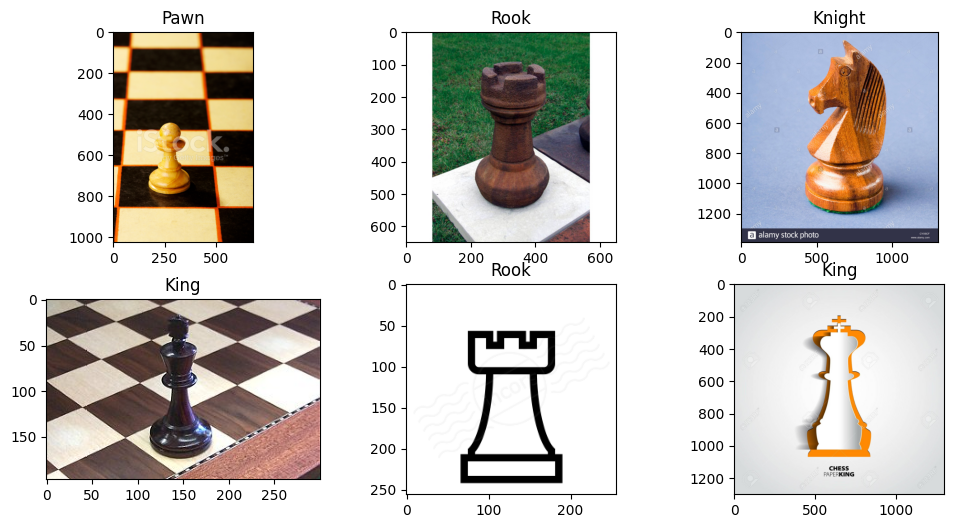

In [25]:
#Dataset class without transformation:
dataset_untransformed = ChessmanDataset(csv_file='chessman.csv', root_dir="", transform=None)

#visualize 6 random images from the loaded dataset
plt.figure(figsize=(12,6))
for i in range(6):
    idx = random.randint(0, len(dataset_untransformed))
    image, class_index = dataset_untransformed[idx]
    ax=plt.subplot(2,3,i+1) # create an axis
    img_text = f"{class_lbl_dict[class_index]}"
    ax.title.set_text(img_text) # create a name of the axis based on the img name
    plt.imshow(image) # show the img

In [26]:
image.shape

(1300, 1299, 3)

In [27]:
# Check if CUDA is available and set PyTorch to use GPU or CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [28]:
# Set the random seed
RANDOM_SEED=551
torch.manual_seed(seed=RANDOM_SEED)
torch.cuda.manual_seed(seed=RANDOM_SEED)

Transformation of image dataset:

In [29]:
try:
    from PIL import Image
except ImportError:
    %pip install pillow

# Define a custom function to rearrange the channels
def rearrange_channels(image):
    # Assuming image has shape (3, H, W), where H is height and W is width
    return image[[2, 0, 1], :, :]  # Rearrange channels from RGB to BGR

# Create the transform pipeline
image_transform = transforms.Compose([
    transforms.ToTensor(),

    # data augmentation like horizontal or vertical Image rotation
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(degrees=15),  # Random rotation up to 30 degrees

    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    # transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225]),

    # transforms.ColorJitter(brightness=5, contrast=0.5, saturation=0.5, hue=0.5),

    transforms.Lambda(rearrange_channels),  # Apply the custom function
    transforms.Resize((224, 224), interpolation=Image.BICUBIC) #BILINEAR, BICUBIC, NEAREST
    # image transform color glittering
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Transformed Images


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


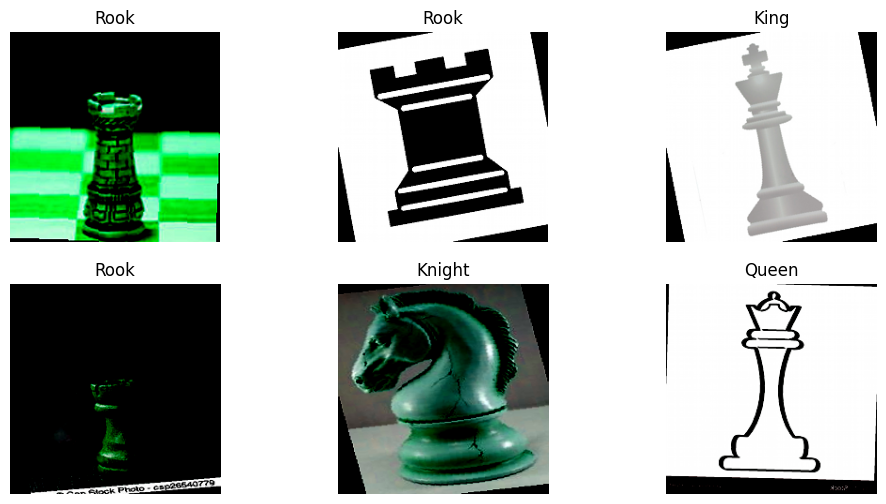

In [30]:
#Dataset class with transformation:
dataset_transformed = ChessmanDataset(csv_file='chessman.csv', root_dir="", transform=image_transform)

print("Transformed Images")
#visualize 6 random images from the loaded dataset
plt.figure(figsize=(12,6))
for i in range(6):
    idx = random.randint(0, len(dataset_transformed))
    image, class_index = dataset_transformed[idx]
    ax=plt.subplot(2,3,i+1) # create an axis
    # img_text = f"{class_name} - {str(class_index)}"
    img_text = f"{class_lbl_dict[class_index]}"
    ax.title.set_text(img_text) # create a name of the axis based on the img name
    # Transpose image data to rearrange dimensions
    image_for_display = np.transpose(image, (1, 2, 0))
    plt.axis('off')  # Hide the scale values
    # Display the image
    plt.imshow(image_for_display)


In [31]:
image.shape

torch.Size([3, 224, 224])

Shuffling the Image dataset.

In [32]:
from torch.utils.data import random_split
from torch.utils.data import DataLoader
try:
    from sklearn.model_selection import train_test_split
except ImportError:
    %pip install scikit-learn
    from sklearn.model_selection import train_test_split
import numpy as np

In [33]:
p_df.shape

(551, 5)

In [34]:
# Extract labels from the dataset
# May take much more time
labels = np.array([label for _, label in dataset_transformed])


In [35]:
from collections import Counter

labels_counter = Counter(labels)

for class_, count_val in labels_counter.items():
    print("ClassName: ",class_lbl_dict[class_],"\t",(class_),"\t\tTotal Images in this class: ", count_val)

ClassName:  Bishop 	 0 		Total Images in this class:  86
ClassName:  King 	 1 		Total Images in this class:  75
ClassName:  Knight 	 2 		Total Images in this class:  105
ClassName:  Pawn 	 3 		Total Images in this class:  106
ClassName:  Queen 	 4 		Total Images in this class:  77
ClassName:  Rook 	 5 		Total Images in this class:  102


**Splitting Dataset**

In [36]:
# split the (train + val_test) into separate training and validation_test sets
# it will have 450 records out of 551 images (80% of the records)

# applied stratified splitting
train_data, val_test_data, train_labels, val_test_labels = train_test_split(
    dataset_transformed, labels, test_size=101, stratify=labels, random_state=42)

# Further split the (val + test) into separate validation and test sets
val_data, test_data, val_labels, test_labels = train_test_split(
    val_test_data, val_test_labels, test_size=51, stratify=val_test_labels, random_state=42)


In [37]:
train_loader1 = DataLoader(dataset=train_data,  shuffle=True)
val_loader1 = DataLoader(dataset=val_data,  shuffle=False)
test_loader1 = DataLoader(dataset=test_data, shuffle=False)

In [38]:
tr_lbl_lst = []
for batch_idx, (images, labels) in enumerate(train_loader1):
    if labels is not None:
        tr_lbl_lst.append(labels.item())

val_lbl_lst = []
for batch_idx, (images, labels) in enumerate(val_loader1):
    if labels is not None:
        val_lbl_lst.append(labels.item())

ts_lbl_lst = []
for batch_idx, (images, labels) in enumerate(test_loader1):
    if labels is not None:
        ts_lbl_lst.append(labels.item())

In [39]:
len(tr_lbl_lst)

450

Equal distribution of data in all the sets, Training set, Validation set and Testing set.

Text(0.5, 1.0, 'Training set')

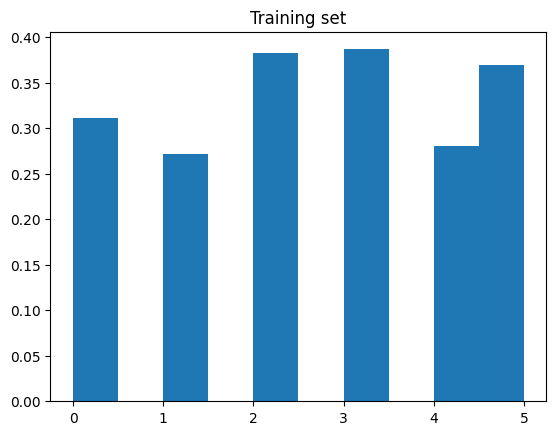

In [40]:
plt.hist(tr_lbl_lst,density=True)
plt.title("Training set")

Text(0.5, 1.0, 'Validation set')

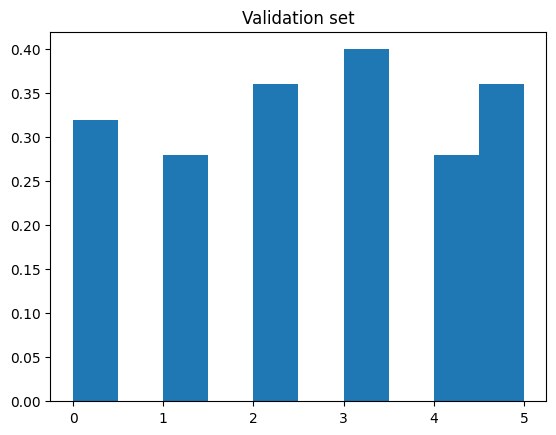

In [41]:
plt.hist(val_lbl_lst,density=True)
plt.title("Validation set")

Text(0.5, 1.0, 'Testing set')

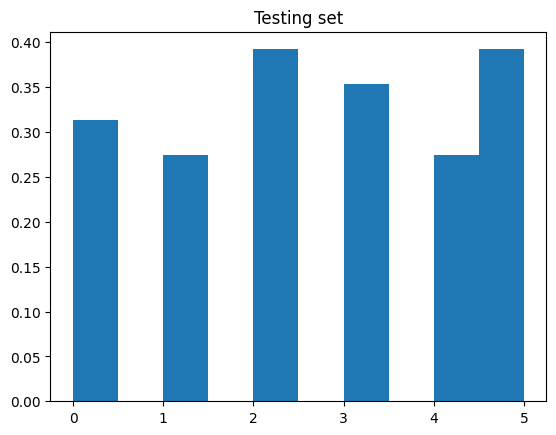

In [42]:
plt.hist(ts_lbl_lst,density=True)
plt.title("Testing set")

In [43]:
batch_size = 32 # hyper parameter
# Creating DataLoader for train, validation, and test sets
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

Displaying all the images of **Training** set Batchwise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 0


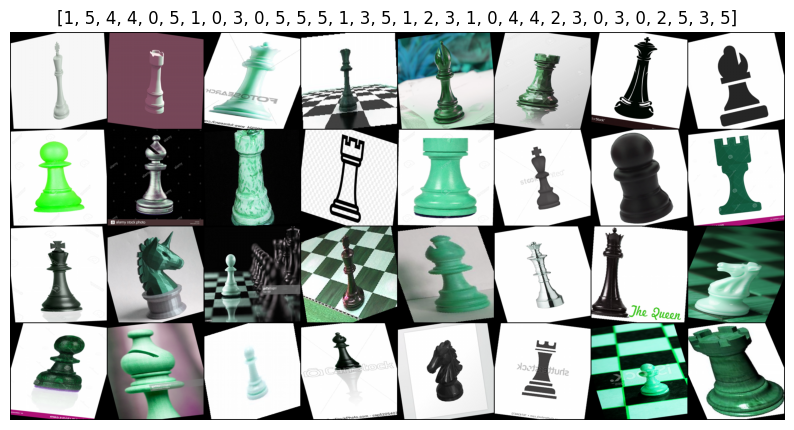

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 1


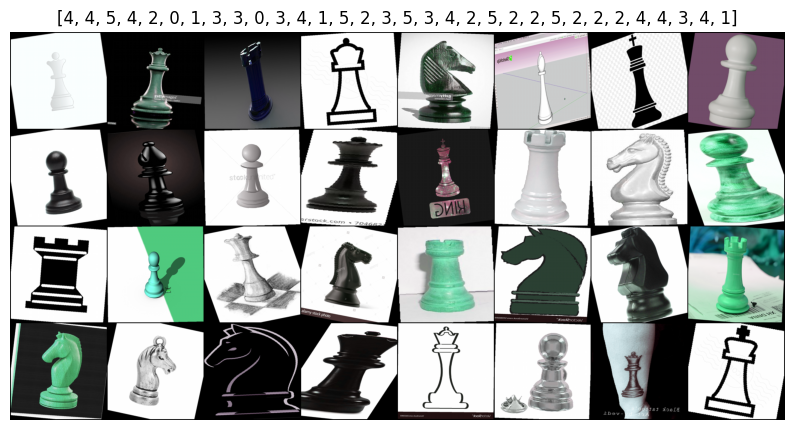

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 2


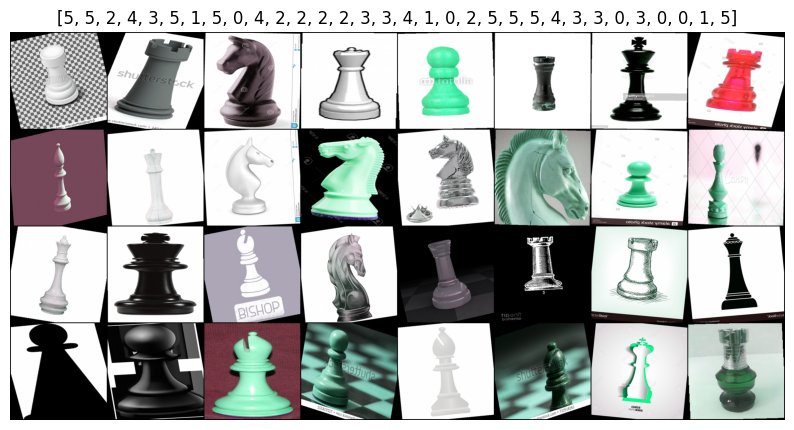

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 3


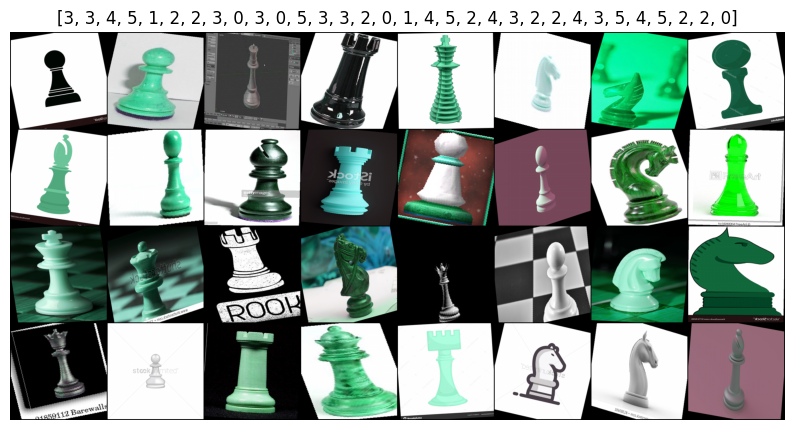

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 4


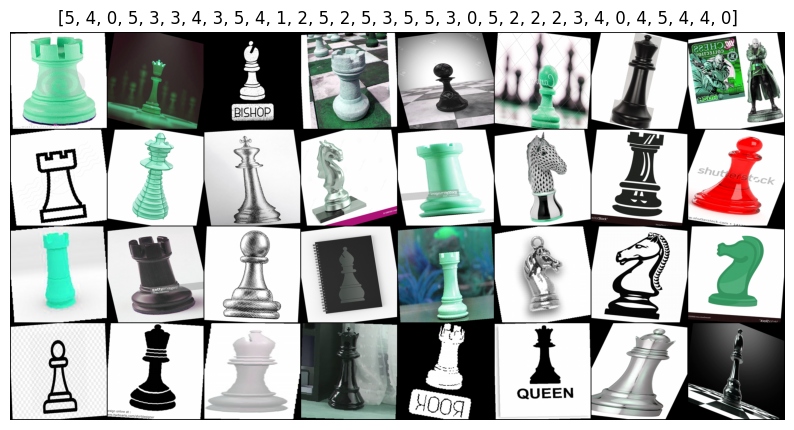

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 5


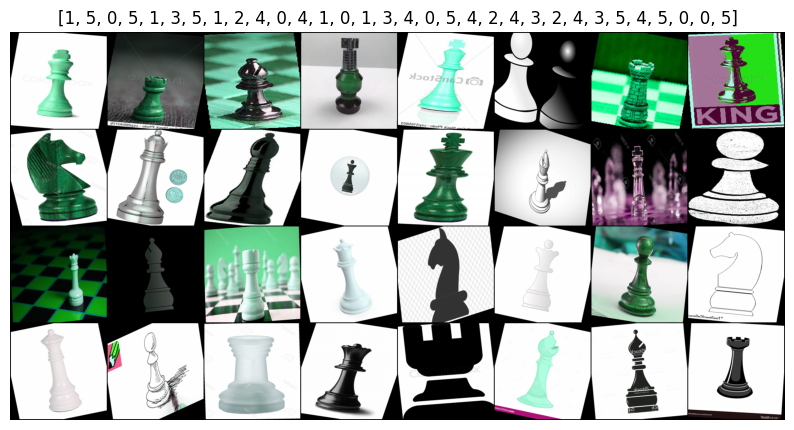

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 6


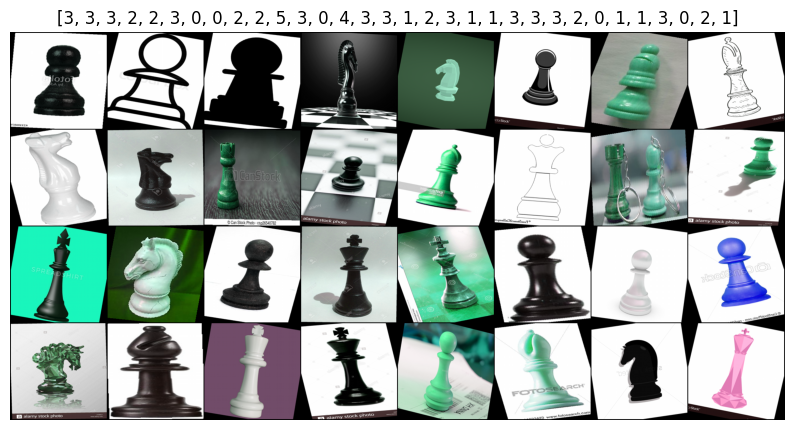

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 7


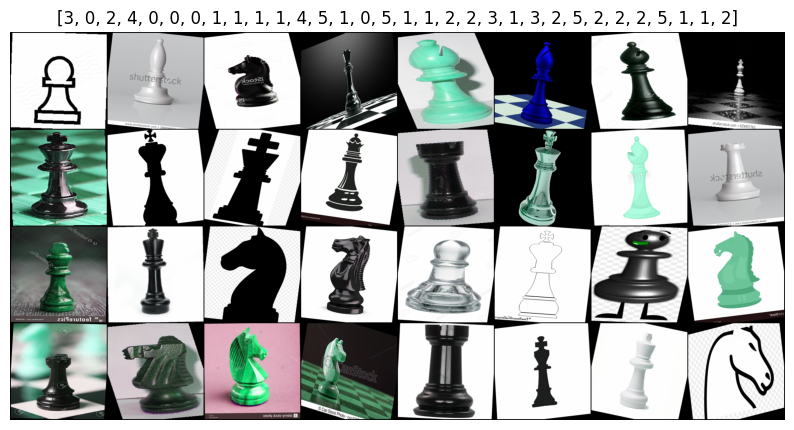

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 8


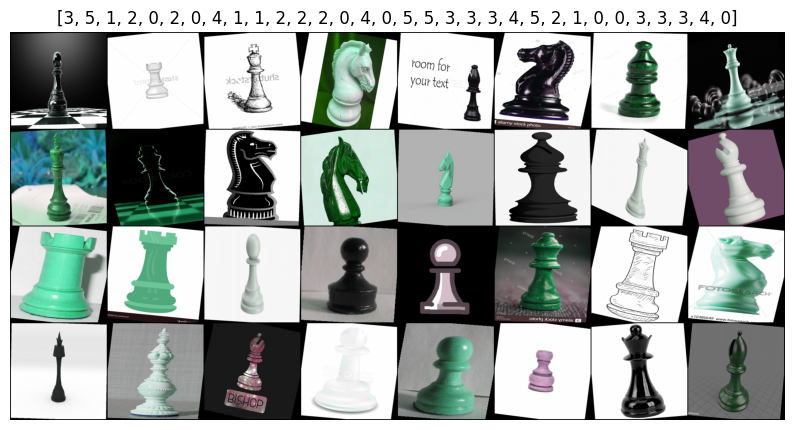

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 9


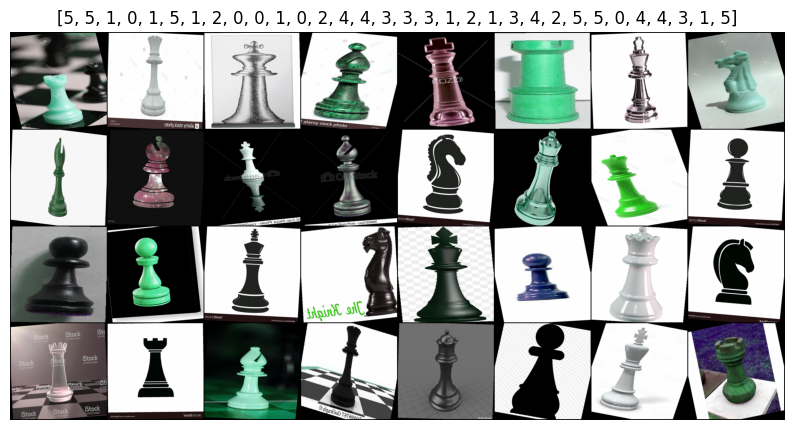

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 10


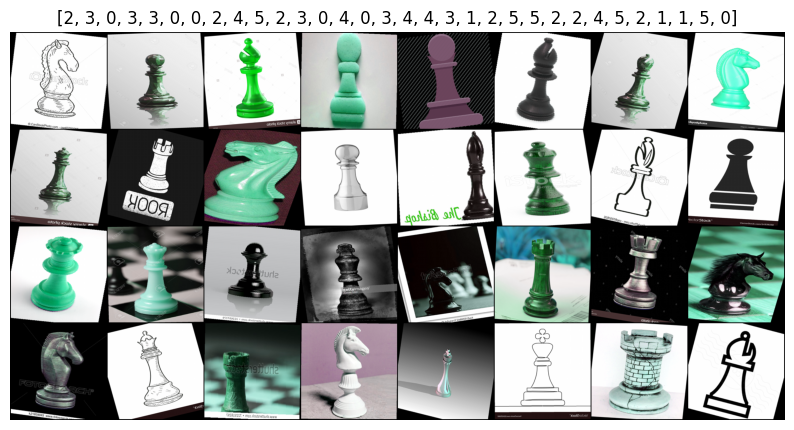

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 11


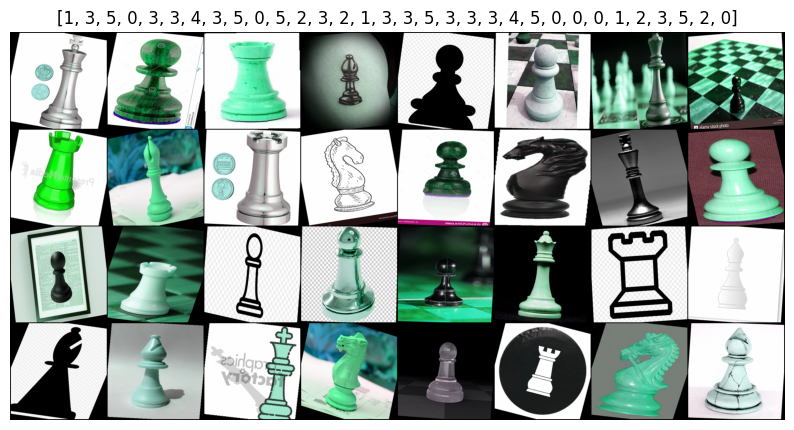

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 12


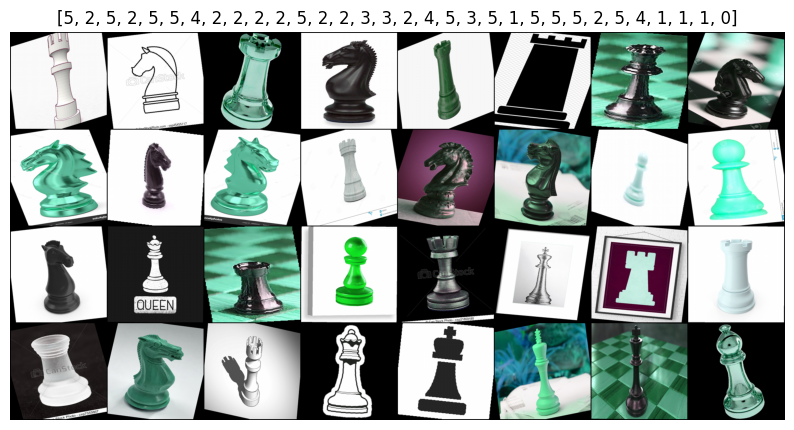

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 13


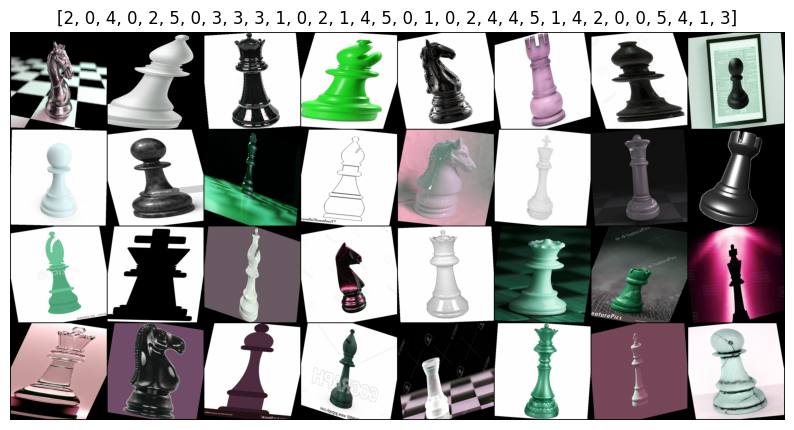

In [44]:
# ================================================
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.utils import make_grid

# Iterate over all batches in train_loader
for batch_idx, (images, labels) in enumerate(train_loader):
    # Display a batch of images
    plt.figure(figsize=(10, 10))
    # Unnormalize images if they were normalized during preprocessing
    # Assuming they were normalized with mean and standard deviation
    # Replace mean and std with your actual values if different
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    images = images * std[:, None, None] + mean[:, None, None]
    # Make a grid from batch of images
    grid = make_grid(images, nrow=8)
    # Transpose the grid to convert from (C, H, W) to (H, W, C)
    plt.imshow(grid.permute(1, 2, 0))
    # Display labels if available
    print('Batch Index',batch_idx)
    if labels is not None:
        plt.title([label.item() for label in labels])
    plt.axis('off')
    plt.show()


Displaying all the images of **Validation** set Batchwise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 0


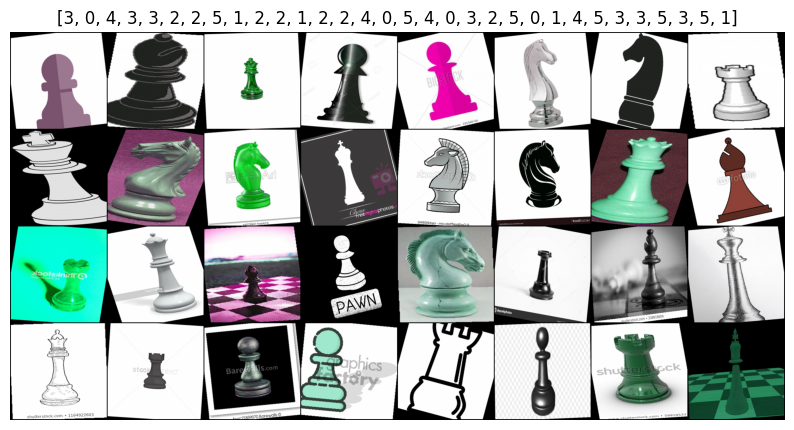

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 1


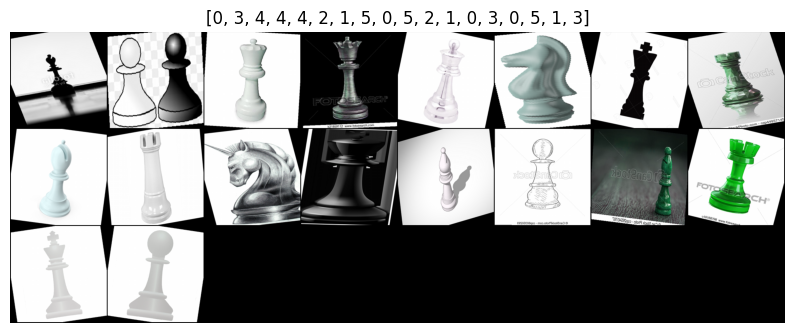

In [45]:
# ================================================
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.utils import make_grid

# Iterate over all batches in val_loader
for batch_idx, (images, labels) in enumerate(val_loader):
    # Display a batch of images
    plt.figure(figsize=(10, 10))
    # Unnormalize images if they were normalized during preprocessing
    # Assuming they were normalized with mean and standard deviation
    # Replace mean and std with your actual values if different
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    images = images * std[:, None, None] + mean[:, None, None]
    # Make a grid from batch of images
    grid = make_grid(images, nrow=8)
    # Transpose the grid to convert from (C, H, W) to (H, W, C)
    plt.imshow(grid.permute(1, 2, 0))
    # Display labels if available
    print('Batch Index',batch_idx)
    if labels is not None:
        plt.title([label.item() for label in labels])
    plt.axis('off')
    plt.show()


Displaying all the images of **Testing** set Batchwise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 0


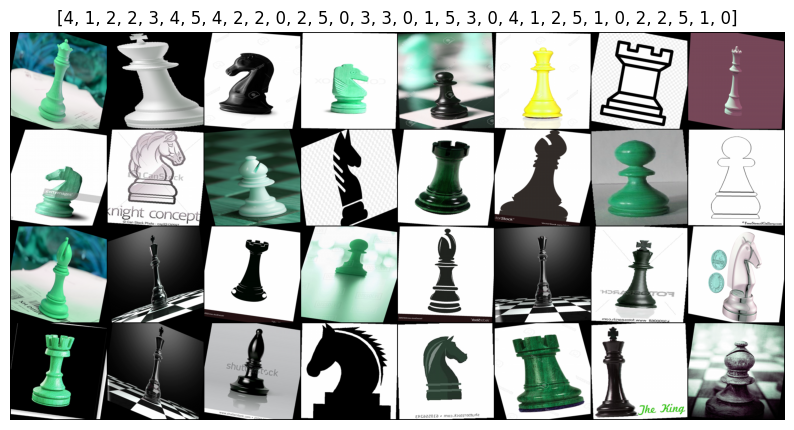

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch Index 1


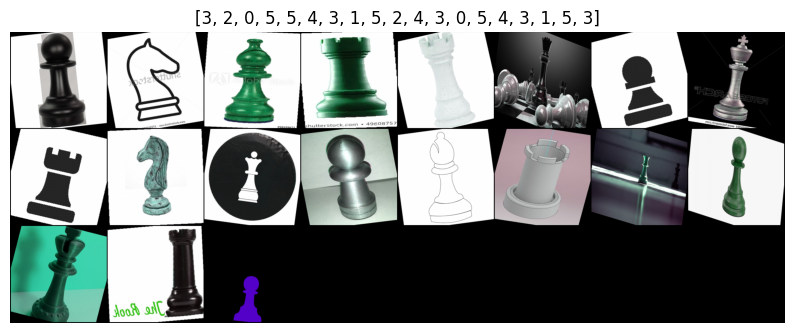

In [46]:
# ================================================
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.utils import make_grid

# Iterate over all batches in test_loader
for batch_idx, (images, labels) in enumerate(test_loader):
    # Display a batch of images
    plt.figure(figsize=(10, 10))
    # Unnormalize images if they were normalized during preprocessing
    # Assuming they were normalized with mean and standard deviation
    # Replace mean and std with your actual values if different
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    images = images * std[:, None, None] + mean[:, None, None]
    # Make a grid from batch of images
    grid = make_grid(images, nrow=8)
    # Transpose the grid to convert from (C, H, W) to (H, W, C)
    plt.imshow(grid.permute(1, 2, 0))
    # Display labels if available
    print('Batch Index',batch_idx)
    if labels is not None:
        plt.title([label.item() for label in labels])
    plt.axis('off')
    plt.show()


# CNN Resnet18

In [47]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from sklearn.metrics import confusion_matrix, f1_score
try:
    import seaborn as sns
except ImportError:
    %pip install seaborn
    import seaborn as sns
from torch.utils.data import random_split
try:
    from tqdm import tqdm
except ImportError:
    %pip install tqdm
    from tqdm import tqdm

In [48]:
# Load pre-trained model & freeze the layers
R18_model = models.resnet18(pretrained=True)

# freeze the layers
for param in R18_model.parameters():
    param.requires_grad = False

C:\Users\spdsp\.conda\envs\PyTorch_VENV\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\spdsp\.conda\envs\PyTorch_VENV\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [49]:
# print(len(list(model.parameters())))
print(R18_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [50]:
# Replacing the last fully connected layer with a 6-classes layer -

num_ftrs = R18_model.fc.in_features
R18_model.fc = nn.Linear(num_ftrs, 6)


In [51]:
print(R18_model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [52]:
# Moving the model to the GPU if available - #
R18_model = R18_model.to(device)

In [53]:
# Define a loss function and optimizer - # Hyper parameter
criterion = nn.CrossEntropyLoss()
optimizer =  optim.Adam(R18_model.parameters(), lr=0.01, weight_decay = 0.01)#, momentum=0.4 )#, weight_decay = 0.001) # if SGD

Model Training process

In [55]:
train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

# Train the model

for epoch in tqdm(range(40)):  # loop over the dataset multiple times (epochs)

    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader, 0):

        # data is a list of [inputs, labels]
        inputs, labels =  data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = R18_model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


    # epoch wise training loss calc --------------------------------------------
    # print & accumulate training statistics (loss & accuracy) every 100 iterations
    # running_loss += loss.item()
    # if i==14: #True: #i % 14 == 0:
    train_losses_val = running_loss / len(train_loader) # per batch loss
    train_losses.append(train_losses_val)
    train_accuracy.append(100 * (correct / total))
    print('\n[%d, %5d] loss: %.3f accuracy: %.3f %%' %
            (epoch + 1, i + 1, train_losses_val, 100 * correct / total))
    # running_loss = 0.0
    # --------------------------------------------------------------------------

    # Validation at the end of the every epoch
    # set mode to eval mode & tell torch no gradients are required.
    R18_model.eval()

    val_loss = 0.0
    val_correct = 0
    val_total = 0
    # loop through the data and find accuracy and loss for all val data
    with torch.no_grad():
      for data in val_loader:
            val_images, val_labels = data[0].to(device), data[1].to(device)
            val_outputs = R18_model(val_images)
            _, predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (predicted == val_labels).sum().item()
            loss_v = criterion(outputs, labels)
            val_loss += loss_v.item()

    # set the model back to train mode
    R18_model.train()
    val_losses.append(val_loss / len(val_loader))
    val_accuracy.append(100 * val_correct / val_total)
    print('Validation loss: %.3f accuracy: %.3f %%' %
          ( (val_loss / len(val_loader)), 100 * val_correct / val_total))
        # ( (val_loss / 100), 100 * val_correct / val_total))
    print()


print('Finished Training')
# -----------------------------------------------------------------------------


  2%|▎         | 1/40 [00:02<01:32,  2.37s/it]


[1,    14] loss: 2.865 accuracy: 26.116 %
Validation loss: 2.568 accuracy: 38.000 %



  5%|▌         | 2/40 [00:02<00:50,  1.32s/it]


[2,    14] loss: 1.417 accuracy: 51.339 %
Validation loss: 1.375 accuracy: 54.000 %



  8%|▊         | 3/40 [00:03<00:35,  1.04it/s]


[3,    14] loss: 1.008 accuracy: 64.062 %
Validation loss: 0.973 accuracy: 42.000 %



 10%|█         | 4/40 [00:03<00:27,  1.31it/s]


[4,    14] loss: 0.852 accuracy: 70.982 %
Validation loss: 0.807 accuracy: 46.000 %



 12%|█▎        | 5/40 [00:04<00:23,  1.51it/s]


[5,    14] loss: 0.886 accuracy: 65.625 %
Validation loss: 1.302 accuracy: 58.000 %



 15%|█▌        | 6/40 [00:05<00:22,  1.54it/s]


[6,    14] loss: 0.716 accuracy: 71.205 %
Validation loss: 0.938 accuracy: 54.000 %



 18%|█▊        | 7/40 [00:05<00:20,  1.61it/s]


[7,    14] loss: 0.645 accuracy: 78.125 %
Validation loss: 0.939 accuracy: 56.000 %



 20%|██        | 8/40 [00:06<00:18,  1.75it/s]


[8,    14] loss: 0.639 accuracy: 75.670 %
Validation loss: 0.578 accuracy: 56.000 %



 22%|██▎       | 9/40 [00:06<00:16,  1.86it/s]


[9,    14] loss: 0.590 accuracy: 77.679 %
Validation loss: 0.311 accuracy: 60.000 %



 25%|██▌       | 10/40 [00:07<00:15,  1.92it/s]


[10,    14] loss: 0.446 accuracy: 85.268 %
Validation loss: 0.401 accuracy: 56.000 %



 28%|██▊       | 11/40 [00:07<00:14,  1.96it/s]


[11,    14] loss: 0.441 accuracy: 87.277 %
Validation loss: 0.534 accuracy: 56.000 %



 30%|███       | 12/40 [00:07<00:13,  2.01it/s]


[12,    14] loss: 0.399 accuracy: 86.607 %
Validation loss: 0.268 accuracy: 60.000 %



 32%|███▎      | 13/40 [00:08<00:13,  2.00it/s]


[13,    14] loss: 0.391 accuracy: 87.054 %
Validation loss: 0.612 accuracy: 58.000 %



 35%|███▌      | 14/40 [00:09<00:13,  1.95it/s]


[14,    14] loss: 0.386 accuracy: 88.170 %
Validation loss: 0.603 accuracy: 52.000 %



 38%|███▊      | 15/40 [00:09<00:12,  1.94it/s]


[15,    14] loss: 0.458 accuracy: 82.812 %
Validation loss: 0.345 accuracy: 48.000 %



 40%|████      | 16/40 [00:10<00:12,  1.94it/s]


[16,    14] loss: 0.550 accuracy: 83.036 %
Validation loss: 0.553 accuracy: 48.000 %



 42%|████▎     | 17/40 [00:10<00:11,  1.96it/s]


[17,    14] loss: 0.461 accuracy: 84.598 %
Validation loss: 0.377 accuracy: 54.000 %



 45%|████▌     | 18/40 [00:11<00:11,  1.97it/s]


[18,    14] loss: 0.349 accuracy: 87.723 %
Validation loss: 0.518 accuracy: 64.000 %



 48%|████▊     | 19/40 [00:11<00:10,  1.92it/s]


[19,    14] loss: 0.432 accuracy: 85.714 %
Validation loss: 0.661 accuracy: 64.000 %



 50%|█████     | 20/40 [00:12<00:10,  1.96it/s]


[20,    14] loss: 0.349 accuracy: 87.946 %
Validation loss: 0.451 accuracy: 60.000 %



 52%|█████▎    | 21/40 [00:12<00:09,  1.97it/s]


[21,    14] loss: 0.315 accuracy: 90.179 %
Validation loss: 0.338 accuracy: 54.000 %



 55%|█████▌    | 22/40 [00:13<00:09,  1.99it/s]


[22,    14] loss: 0.342 accuracy: 88.393 %
Validation loss: 0.276 accuracy: 54.000 %



 57%|█████▊    | 23/40 [00:13<00:08,  1.99it/s]


[23,    14] loss: 0.403 accuracy: 84.821 %
Validation loss: 0.207 accuracy: 54.000 %



 60%|██████    | 24/40 [00:14<00:07,  2.00it/s]


[24,    14] loss: 0.275 accuracy: 91.295 %
Validation loss: 0.161 accuracy: 56.000 %



 62%|██████▎   | 25/40 [00:14<00:07,  1.97it/s]


[25,    14] loss: 0.298 accuracy: 91.964 %
Validation loss: 0.308 accuracy: 48.000 %



 65%|██████▌   | 26/40 [00:15<00:06,  2.00it/s]


[26,    14] loss: 0.254 accuracy: 93.080 %
Validation loss: 0.284 accuracy: 52.000 %



 68%|██████▊   | 27/40 [00:15<00:06,  2.00it/s]


[27,    14] loss: 0.193 accuracy: 95.759 %
Validation loss: 0.274 accuracy: 58.000 %



 70%|███████   | 28/40 [00:16<00:06,  1.99it/s]


[28,    14] loss: 0.212 accuracy: 95.312 %
Validation loss: 0.511 accuracy: 64.000 %



 72%|███████▎  | 29/40 [00:16<00:05,  2.01it/s]


[29,    14] loss: 0.308 accuracy: 91.295 %
Validation loss: 0.320 accuracy: 66.000 %



 75%|███████▌  | 30/40 [00:17<00:04,  2.04it/s]


[30,    14] loss: 0.234 accuracy: 94.196 %
Validation loss: 0.262 accuracy: 58.000 %



 78%|███████▊  | 31/40 [00:17<00:04,  2.04it/s]


[31,    14] loss: 0.222 accuracy: 93.973 %
Validation loss: 0.365 accuracy: 56.000 %



 80%|████████  | 32/40 [00:18<00:03,  2.05it/s]


[32,    14] loss: 0.187 accuracy: 95.759 %
Validation loss: 0.229 accuracy: 60.000 %



 82%|████████▎ | 33/40 [00:18<00:03,  2.02it/s]


[33,    14] loss: 0.211 accuracy: 93.080 %
Validation loss: 0.195 accuracy: 58.000 %



 85%|████████▌ | 34/40 [00:19<00:02,  2.05it/s]


[34,    14] loss: 0.210 accuracy: 95.089 %
Validation loss: 0.403 accuracy: 56.000 %



 88%|████████▊ | 35/40 [00:19<00:02,  2.05it/s]


[35,    14] loss: 0.221 accuracy: 94.643 %
Validation loss: 0.235 accuracy: 60.000 %



 90%|█████████ | 36/40 [00:20<00:01,  2.04it/s]


[36,    14] loss: 0.192 accuracy: 96.875 %
Validation loss: 0.140 accuracy: 58.000 %



 92%|█████████▎| 37/40 [00:20<00:01,  2.03it/s]


[37,    14] loss: 0.189 accuracy: 94.643 %
Validation loss: 0.152 accuracy: 54.000 %



 95%|█████████▌| 38/40 [00:20<00:00,  2.05it/s]


[38,    14] loss: 0.215 accuracy: 94.420 %
Validation loss: 0.133 accuracy: 56.000 %



 98%|█████████▊| 39/40 [00:21<00:00,  2.08it/s]


[39,    14] loss: 0.210 accuracy: 94.196 %
Validation loss: 0.120 accuracy: 56.000 %



100%|██████████| 40/40 [00:21<00:00,  1.82it/s]


[40,    14] loss: 0.190 accuracy: 95.536 %
Validation loss: 0.186 accuracy: 60.000 %

Finished Training


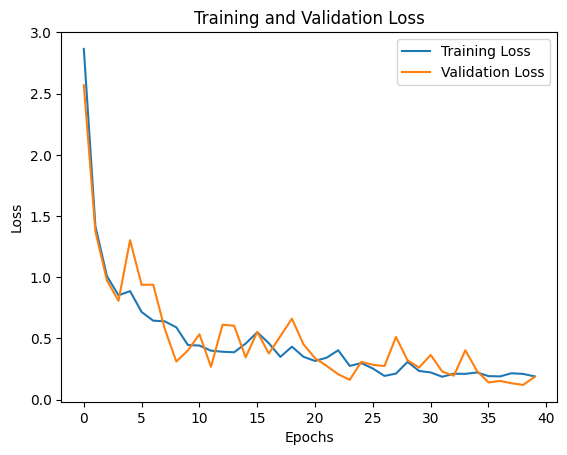

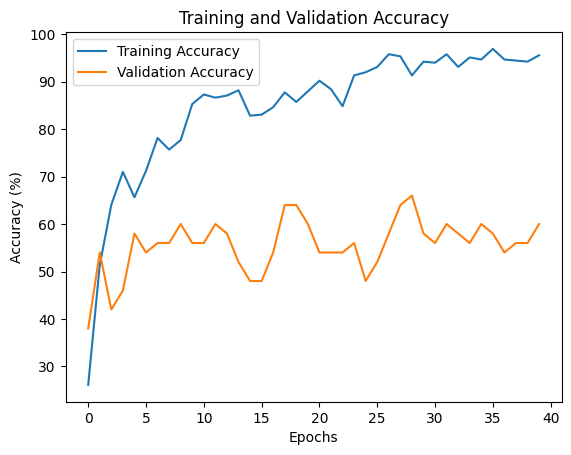

In [56]:
# ------------------------------- Plotting -------------------------------------
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
# -----------------------------------------------------------------------------


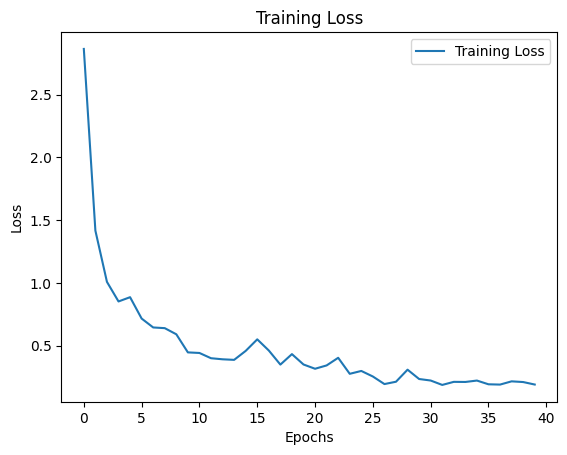

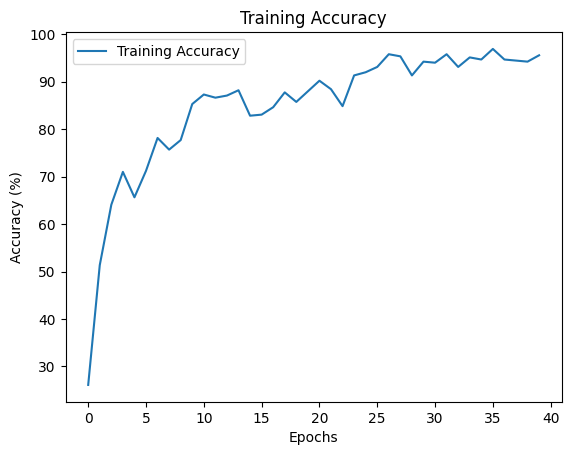

In [57]:

# ------------------------------- Plotting -------------------------------------
plt.figure()
plt.plot(train_losses, label='Training Loss')
# plt.plot(val_losses, label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(train_accuracy, label='Training Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
# -----------------------------------------------------------------------------


Evaluation metrics

In [58]:
# Test the model on test data and get confusion matrix
y_true = []
y_pred = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = R18_model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


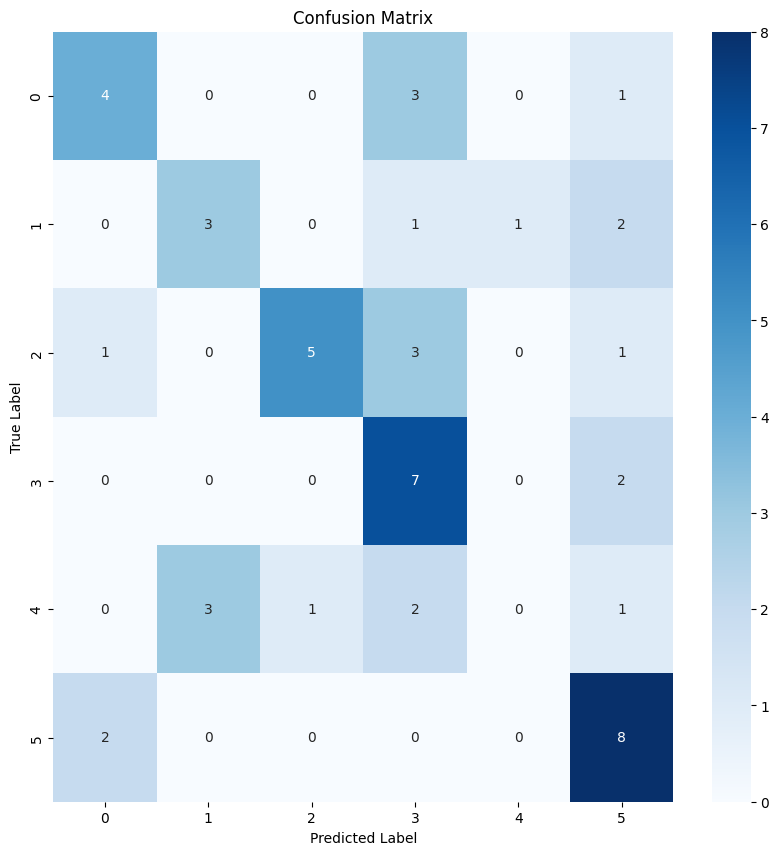

In [59]:
# Find and plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [60]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.50      0.43      0.46         7
           2       0.83      0.50      0.62        10
           3       0.44      0.78      0.56         9
           4       0.00      0.00      0.00         7
           5       0.53      0.80      0.64        10

    accuracy                           0.53        51
   macro avg       0.48      0.50      0.47        51
weighted avg       0.50      0.53      0.49        51



In [61]:
# Calculate and print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.5294
Precision: 0.5034
Recall: 0.5294
F1-score: 0.4939


In [ ]:
# End of the Program